<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/ML_Diabetic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Plot settings

In [40]:
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['figure.figsize'] = 7,4
sns.set_style('ticks')

# Reading the data



In [41]:
# Importing the datasets
df = pd.read_csv('diabetes.csv')

# Display the data

In [42]:
df.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [43]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Data Visulatization**

In [44]:
from matplotlib import pyplot as plt

# fig, (ax1, ax2,ax3) = plt.subplots(1,3)
# fig.suptitle('Data Statistics')
# ax1.plot(OSA, 'o-')
# ax1.set_ylabel('Damped oscillation')
# ax2.plot(x2, y2, '.-')
# ax2.set_xlabel('time (s)')
# ax2.set_ylabel('Undamped')
# plt.show()

# plt.subplot(13)
# # equivalent but more general
# ax1 = plt.subplot(2, 2, 1)
# # add a subplot with no frame
# ax2 = plt.subplot(222, frameon=False)
# # add a polar subplot
# plt.subplot(223, projection='polar')

# snore_freq	snore_vol	choke_freq	apnea_freq	awake_freq	apnea

# fig, axes = plt.subplots(1,7,figsize=(14,5),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='apnea')
# sns.countplot(ax=axes[1],data=df, x='snore_freq')
# sns.countplot(ax=axes[2],data=df, x='snore_vol')
# sns.countplot(ax=axes[3],data=df, x='choke_freq')
# sns.countplot(ax=axes[4],data=df, x='apnea_freq')
# sns.countplot(ax=axes[5],data=df, x='snore_freq')
# sns.countplot(ax=axes[6],data=df, x='awake_freq')
# plt.savefig('Statistics.png')


# Normalizing the data

In [45]:
from sklearn.preprocessing import StandardScaler
 
x_data = df.drop('Outcome', axis = 1)
Y      = df['Outcome']

sc = StandardScaler()
X  = sc.fit_transform(x_data)


In [46]:
# from sklearn import preprocessing
# import numpy as np

# features = ['snore_freq','snore_vol','choke_freq','apnea_freq','awake_freq']
# x_data = df[features]
# y         = df['apnea']

# # Normalize data
# x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [47]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Preparing data for machine learning

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

## Correlation between different variables

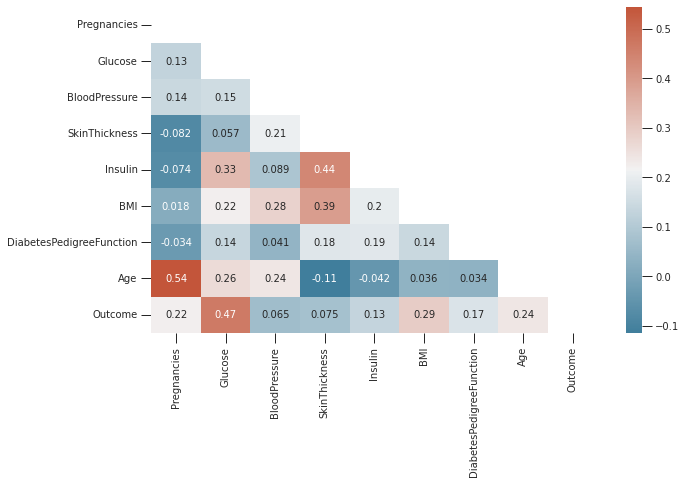

In [49]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(10, 6))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')


## Class distribution in Diabetic dataset

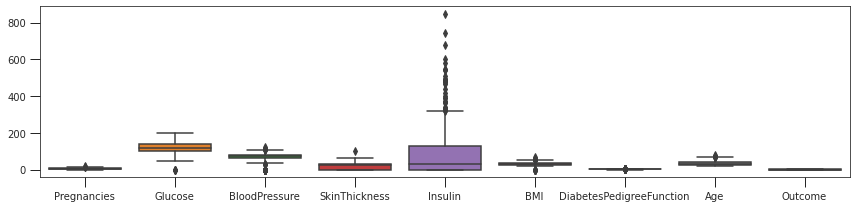

In [50]:
fig, axs = plt.subplots(figsize=(12, 3), tight_layout=True)
sns.boxplot(data=df)
plt.savefig("BoxplotData.png")
plt.show()

In [51]:
# snore_freq	snore_vol	choke_freq	apnea_freq	awake_freq	apnea
# sns.pairplot(df, vars=["choke_freq","apnea_freq","awake_freq","apnea"])
# plt.grid()
# plt.savefig('Correction with Apnea.png')
# plt.show()

In [72]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix 

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import ConfusionMatrixDisplay

  cm1  = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1 = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1    = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  ##########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2  = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2    = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)


  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=12, color='k')

  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=12, color='k')
  
  f.suptitle(' Confusion matrix for '+name, fontsize=13,y=1.07)
  plt.savefig(name + ".png")
  plt.show()

Performance Criteria in Training Case for LR
Accuracy  0.762
precision 0.709
recall 0.575
Performance Criteria in Testing Case for LR
Accuracy  0.825
precision 0.763
recall 0.617


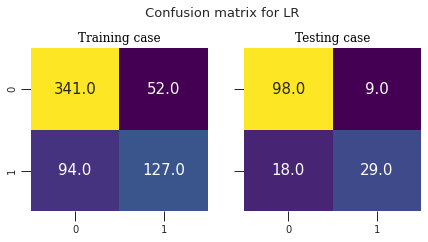

Performance Criteria in Training Case for SVM
Accuracy  0.819
precision 0.824
recall 0.633
Performance Criteria in Testing Case for SVM
Accuracy  0.792
precision 0.703
recall 0.553


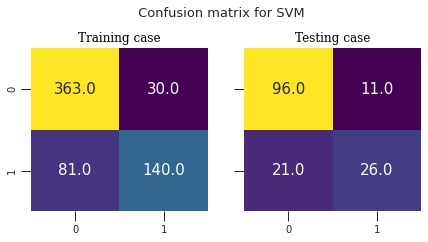

Performance Criteria in Training Case for GBC
Accuracy  0.919
precision 0.921
recall 0.846
Performance Criteria in Testing Case for GBC
Accuracy  0.812
precision 0.688
recall 0.702


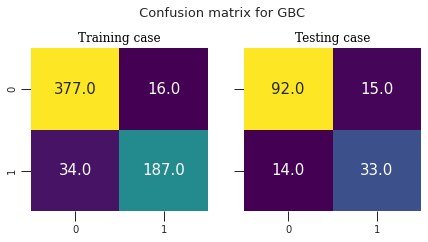

Performance Criteria in Training Case for GNB
Accuracy  0.757
precision 0.680
recall 0.615
Performance Criteria in Testing Case for GNB
Accuracy  0.792
precision 0.674
recall 0.617


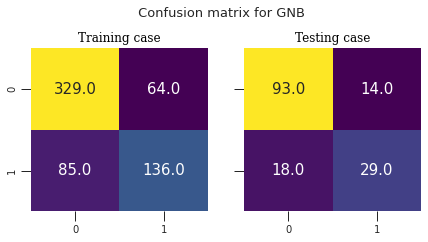

Performance Criteria in Training Case for KNC
Accuracy  0.813
precision 0.773
recall 0.679
Performance Criteria in Testing Case for KNC
Accuracy  0.805
precision 0.698
recall 0.638


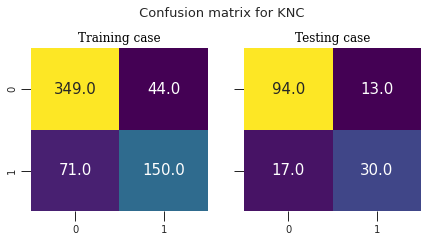

Performance Criteria in Training Case for DT
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  0.779
precision 0.627
recall 0.681


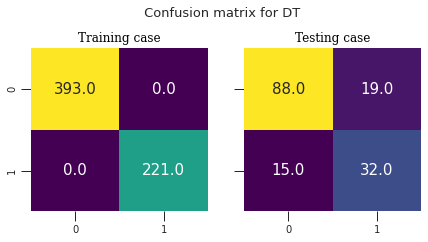

Performance Criteria in Training Case for RFC
Accuracy  1.000
precision 1.000
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  0.818
precision 0.711
recall 0.681


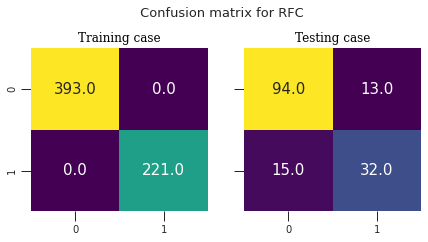

Performance Criteria in Training Case for ANN
Accuracy  0.795
precision 0.857
recall 0.516
Performance Criteria in Testing Case for ANN
Accuracy  0.779
precision 0.741
recall 0.426


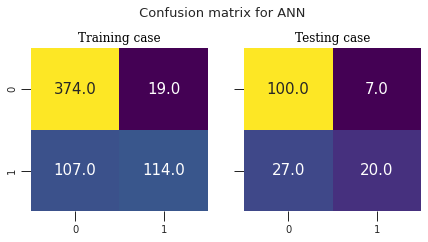

In [73]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)

#SVM ####################################
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_SVC.png')
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GBC.png')
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))

#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GNB.png')
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))

# A random forest classifier.
# A random forest is a meta estimator that fits a number of decision tree 
# classifiers on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr5,tpr5,label="KNN, AUC="+str(auc))

# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)
# tree.plot_tree(clf)
# ax1.plot(fpr6,tpr6,label="DT, AUC="+str(auc))

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr7,tpr7,label="RandomForestClassifier, AUC="+str(auc))

#Neural network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', hidden_layer_sizes=(15, 1), learning_rate='adaptive',
                    random_state=1, max_iter=5000)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr8,tpr8,label="MLPClassifier, AUC="+str(auc))

In [54]:
# import graphviz
# import pydotplus

# names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']

# fig = plt.figure(figsize=(25,20))
# dot_data = tree.export_graphviz(DT, out_file=None,  feature_names=features,  class_names=names,  filled=True, rounded=True,  special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

# pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"5,5!"')
# pydot_graph.write_png('resized_tree.png')
# gvz_graph = graphviz.Source(pydot_graph.to_string())
# graph.render(view=True)

In [55]:
# features = ['Pregnancies'	,'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI'	,'DiabetesPedigreeFunction','Age']

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(DT, feature_names=features, class_names=names, filled=True)

In [56]:
# import matplotlib.pyplot as plt

# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr1, tpr1, label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2, tpr2, label="SVC, AUC="+str(auc))
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [57]:
# import matplotlib.pyplot as plt
# ax = plt.axes()
# fig = plt.figure(figsize=(8,6))
# ax.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# ax.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))
# ax.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))
# ax.plot(fpr5,tpr5,label="RandomForestClassifier, AUC="+str(auc))
# ax.plot(fpr6,tpr6,label="KNN, AUC="+str(auc))
# # plt.legend()
# plt.savefig('ROC.png')

In [58]:
# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')
# ax = fig.add_subplot(111)
# plt.plot(fpr1,tpr1,label="LogisticRegression, AUC="+str(auc))
# plt.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))
# ax.set_xticklabels(names)
# plt.show()

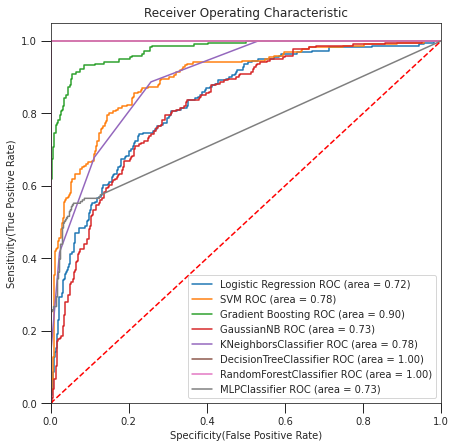

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'SVM',
    'model': SVC(gamma='auto', probability=True),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model': tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None),
},
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None),
},
{
    'label': 'MLPClassifier',
    'model': MLPClassifier(solver='adam', hidden_layer_sizes=(15, 1), learning_rate='adaptive',
                    random_state=1, max_iter=5000),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_train) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_train,model.predict(x_train))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display


In [60]:
# from sklearn.metrics import RocCurveDisplay

# fig = plt.figure(figsize=(8,4))
# fig.suptitle('ROC')

# disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")
# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate \n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")

# disp = RocCurveDisplay.from_estimator(svm, x_test, y_test, marker="+")
# _ = disp.ax_.set_title("Receiver Operating Characteristic curve")

# plt.xlabel("False positive rate")
# plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend(loc="lower right")

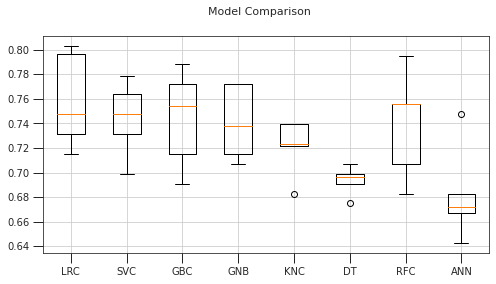

In [61]:
# Boxplot of the mean results of each supervised model for comparison 
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']
fig = plt.figure(figsize=(8,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('BoxPlot_Curves.png')
plt.show()